<a href="https://colab.research.google.com/github/Mahjabeenqamar1/Data_camp_project/blob/main/Investigating_Netflix_Movies_and_Guest_Stars_in_The_Office.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Loading your friend's data into a dictionary
Someone's feet on table facing a television

Netflix! What started in 1997 as a DVD rental service has since exploded into the largest entertainment/media company by market capitalization, boasting over 200 million subscribers as of January 2021.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex our data manipulation skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. For their first order of business, they have been performing some analyses, and they believe that the average duration of movies has been declining.

As evidence of this, they have provided us with the following information. For the years from 2011 to 2020, the average movie durations are 103, 101, 99, 100, 100, 95, 95, 96, 93, and 90, respectively.

If we're going to be working with this data, we know a good place to start would be to probably start working with pandas. But first we'll need to create a DataFrame from scratch. Let's start by creating a Python object covered in Intermediate Python: a dictionary!

In [9]:
# Create the years and durations lists
years = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

# Create a dictionary with the two lists
movie_dict = {"years":years,"durations":durations}
# Print the dictionary
movie_dict

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}

In [10]:
# Import pandas under its usual alias
import pandas as pd

# Create a DataFrame from the dictionary
durations_df = pd.DataFrame(movie_dict)

# Print the DataFrame
print(movie_dict)

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}


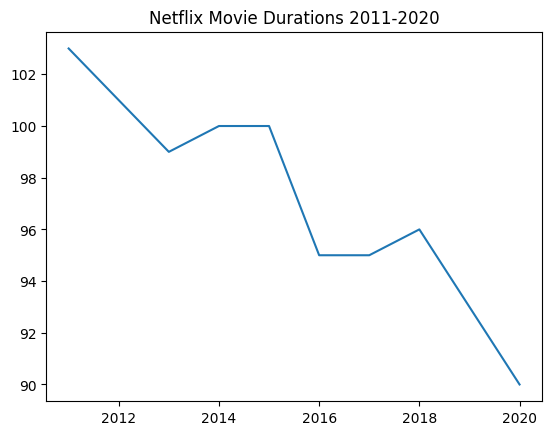

In [11]:
# Import matplotlib.pyplot under its usual alias and create a figure
import matplotlib.pyplot as plt
fig = plt.figure()

# Draw a line plot of release_years and durations
plt.plot(durations_df["years"],durations_df["durations"])
# Create a title
plt.title('Netflix Movie Durations 2011-2020')

# Show the plot
plt.show()

In [12]:
# Read in the CSV as a DataFramedatasets/netflix_data.csv
netflix_df = pd.read_csv("/content/netflix_data.csv")

# Print the first five rows of the DataFrame
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [13]:
# Subset the DataFrame for type "Movie"
netflix_df_movies_only = netflix_df[netflix_df['type']=='Movie']

# Select only the columns of interest
netflix_movies_col_subset = netflix_df_movies_only[["title", "country", "genre", "release_year",  "duration"]]

# Print the first five rows of the new DataFrame
print(netflix_movies_col_subset.head())

   title        country          genre  release_year  duration
1   7:19         Mexico         Dramas          2016        93
2  23:59      Singapore  Horror Movies          2011        78
3      9  United States         Action          2009        80
4     21  United States         Dramas          2008       123
6    122          Egypt  Horror Movies          2019        95


<Figure size 1200x800 with 0 Axes>

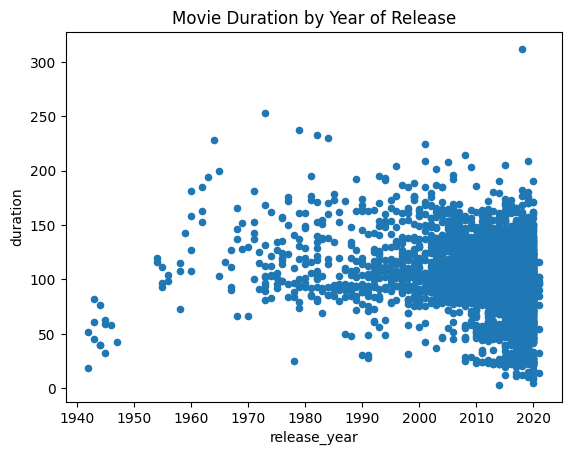

In [14]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
netflix_movies_col_subset.plot(x = "release_year",y = "duration",kind="scatter")
# Create a title
plt.title("Movie Duration by Year of Release")

# Show the plot
plt.show()

In [15]:
# Filter for durations shorter than 60 minutes
short_movies = netflix_movies_col_subset[netflix_movies_col_subset['duration']>60]

# Print the first 20 rows of short_movies
print(short_movies.head(20))

                   title         country               genre  release_year  \
1                   7:19          Mexico              Dramas          2016   
2                  23:59       Singapore       Horror Movies          2011   
3                      9   United States              Action          2009   
4                     21   United States              Dramas          2008   
6                    122           Egypt       Horror Movies          2019   
7                    187   United States              Dramas          1997   
8                    706           India       Horror Movies          2019   
9                   1920           India       Horror Movies          2008   
10                  1922   United States              Dramas          2017   
13                 2,215        Thailand       Documentaries          2018   
14                  3022   United States  Independent Movies          2019   
15                Oct-01         Nigeria              Dramas    

In [17]:
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for idx , rows in netflix_movies_col_subset.iterrows() :
    if rows['genre'] == ["Children"] :
        colors.append("red")
    elif rows['genre'] == ["Documentaries"] :
        colors.append("blue")
    elif rows['genre'] == ["Stand-Up"] :
        colors.append("green")
    else:
        colors.append("black")

# Inspect the first 10 values in your list
...

Ellipsis

<Figure size 1200x800 with 0 Axes>

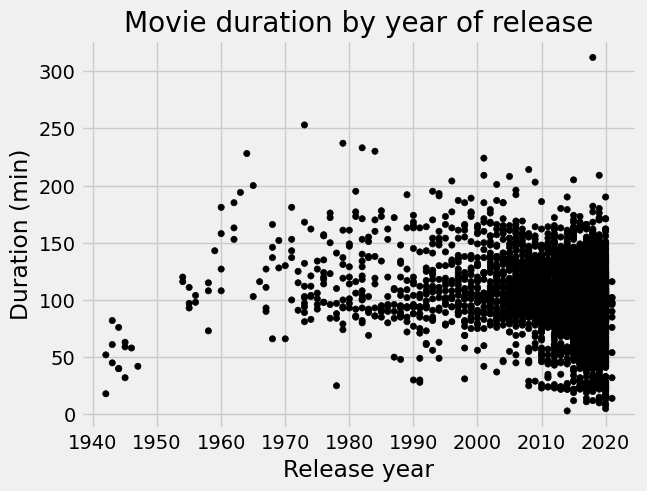

In [18]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
netflix_movies_col_subset.plot(x = "release_year",y = "duration",kind="scatter",color = colors)

# Create a title and axis labels
plt.title("Movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")

# Show the plot
plt.show()

In [19]:
# Are we certain that movies are getting shorter?
are_movies_getting_shorter = "maybe"